# Plot model output

started 2023-05-12
by Eva Lieungh, Lasse T. Keetz, chatGPT

Notebook copied and modified from the [LSP](https://github.com/NorESMhub/noresm-land-sites-platform), which again is inspired from other sources like CTSM and FATES tutorials (e.g. [NCAR/ctsm_python_gallery](https://github.com/NCAR/ctsm_python_gallery)).

Prerequisite: Concatenate history files (one file per month of the simulation) into a single file. Notebook in ../data_handling

In this notebook:
1. read in concatenated output files from five simulations from the manuscript
2. plot aboveground biomass per PFT in all simulations
3. plot NPP in all simulations

In [1]:
import xarray as xr  # NetCDF data handling
import matplotlib.pyplot as plt  # Plotting
import time  # Keeping track of runtime
import json  # For reading data dictionaries stored in json format
import datetime as dt  # for workaround with long simulations (beyond year 2262)
from pathlib import Path
import pandas as pd

Define names and paths to the NetCDF output

In [2]:
%%bash
pwd

/mnt/c/Users/evaler/OneDrive - Universitetet i Oslo/Eva/PHD/FATES_INCLINE/src/analysis_and_plotting


In [3]:
# Set simulation (case) names
DA = "alp4-1500-gswp3-DA"
DB = "alp4-1500-gswp3-DB"
IA = "alp4-1500-cosmo-IA"
IB = "alp4-1500-cosmo-IB"
IW = "alp4-1500-warmed-IW"

file_paths = {
    'DA': "alp4-1500-gswp3-DA",
    'DB': "alp4-1500-gswp3-DB",
    'IA': "alp4-1500-cosmo-IA",
    'IB': "alp4-1500-cosmo-IB",
    'IW': "alp4-1500-warmed-IW"
}

# Enter the site code from the LSP
site_code = "ALP4"

In [4]:
file_paths['IW']

'alp4-1500-warmed-IW'

Enter the file path and names of the output files

In [5]:
# Path to concatenated land archive output - change to dict
#output_data_path = str(Path(f"../../results/{file_paths['DA']}/"))
#output_data_path = f"../../results/{file_paths['IW']}/"
output_data_path = f"../../results/{file_paths['IA']}"

# change to loop
# Enter the name of a single output file, e.g. created with the 'combine_nc_files' notebook. For example:
file_path_DA = f"{output_data_path}/alp4-1500-gswp3-DA.0-1500.nc"
file_path_DB = f"{output_data_path}/alp4-1500-gswp3-DB.0-1500.nc"
file_path_IA = f"{output_data_path}/alp4-1500-cosmo-IA.0-1500.nc"
file_path_IB = f"{output_data_path}/alp4-1500-cosmo-IB.0-1500.nc"
file_path_IW = f"{output_data_path}/alp4-1500-warmed-IW.0-1500.nc"

Read in the data files

In [6]:
file_path_IA


'../../results/alp4-1500-cosmo-IA/alp4-1500-cosmo-IA.0-1500.nc'

In [7]:
# Read data - NB check if loop below works better
#DA_data = xr.open_mfdataset(file_path_DA,
#                            combine='by_coords',
#                            decode_times=True
#                            )
#
#DB_data = xr.open_mfdataset(file_path_DB,
#                            combine='by_coords',
#                            decode_times=True
#                            )
#
IA_data = xr.open_mfdataset(file_path_IA,
                            combine='by_coords',
                            decode_times=True
                            )

#IB_data = xr.open_mfdataset(file_path_IB,
#                            combine='by_coords',
#                            decode_times=True
#                            )
#
#IW_data = xr.open_mfdataset(file_path_IW,
#                            combine='by_coords',
#                            decode_times=True
#                            )

In [ ]:
# alternative with loop:
file_paths = {
    'DA': file_path_DA,
    'DB': file_path_DB,
    'IA': file_path_IA,
    'IB': file_path_IB,
    'IW': file_path_IW
}

data = {}

for dataset, path in file_paths.items():
    data[dataset] = xr.open_mfdataset(path, 
                                      combine='by_coords', 
                                      decode_times=True)


Define folder for the case's output plots

In [8]:
# set folder
plot_save_path = Path("../../results/figures/")

if not plot_save_path.is_dir():
    plot_save_path.mkdir(parents=True, 
                         exist_ok=True)

### Data set exploration
The code cell below prints relevant information about a NetCDF file with the `xarray` package. Note that you can click in the printed information below to display more informaton.

In [9]:
# Print full dataset information
#data["DA"]
IA_data

<xarray.Dataset>
Dimensions:                           (levgrnd: 25, levsoi: 20, levlak: 10,
                                       levdcmp: 25, fates_levscls: 13,
                                       fates_levscag: 91, fates_levscpf: 156,
                                       fates_levcacls: 2, fates_levcapf: 24,
                                       fates_levage: 7, fates_levheight: 6,
                                       fates_levpft: 12, fates_levfuel: 6,
                                       ...
                                       fates_levagepft: 84,
                                       fates_levagefuel: 42, fates_levcdsc: 26,
                                       fates_levcdpf: 312, fates_levcdam: 2,
                                       time: 18000, hist_interval: 2,
                                       lndgrid: 1, fates_levelem: 1,
                                       fates_levelcwd: 4, glc_nec: 10, ltype: 9)
Coordinates: (12/15)
  * levgrnd                           (levgrnd) float32 0.01 0.04 ... 28.87 42.0
  * levsoi                            (levsoi) float32 0.01 0.04 ... 6.94 8.03
  * levlak                            (levlak) float32 0.05 0.6 ... 34.33 44.78
  * levdcmp                           (levdcmp) float32 0.01 0.04 ... 28.87 42.0
  * fates_levscls                     (fates_levscls) float32 0.0 5.0 ... 100.0
  * fates_levcacls                    (fates_levcacls) float32 0.0 5.0
    ...                                ...
  * fates_levfuel                     (fates_levfuel) int32 1 2 3 4 5 6
  * fates_levcwdsc                    (fates_levcwdsc) int32 1 2 3 4
  * fates_levcan                      (fates_levcan) int32 1 2
  * fates_levleaf                     (fates_levleaf) int32 1 2 3 4 ... 28 29 30
  * fates_levcdam                     (fates_levcdam) float32 0.0 80.0
  * time                              (time) object 0001-02-01 00:00:00 ... 1...
Dimensions without coordinates: fates_levscag, fates_levscpf, fates_levcapf,
                                fates_levcnlf, fates_levcnlfpf,
                                fates_levscagpf, fates_levagepft,
                                fates_levagefuel, fates_levcdsc, fates_levcdpf,
                                hist_interval, lndgrid, fates_levelem,
                                fates_levelcwd, glc_nec, ltype
Data variables: (12/505)
    fates_scmap_levscag               (fates_levscag) int32 dask.array<chunksize=(91,), meta=np.ndarray>
    fates_agmap_levscag               (fates_levscag) int32 dask.array<chunksize=(91,), meta=np.ndarray>
    fates_pftmap_levscpf              (fates_levscpf) int32 dask.array<chunksize=(156,), meta=np.ndarray>
    fates_scmap_levscpf               (fates_levscpf) int32 dask.array<chunksize=(156,), meta=np.ndarray>
    fates_pftmap_levcapf              (fates_levcapf) int32 dask.array<chunksize=(24,), meta=np.ndarray>
    fates_camap_levcapf               (fates_levcapf) int32 dask.array<chunksize=(24,), meta=np.ndarray>
    ...                                ...
    WTGQ                              (time, lndgrid) float32 dask.array<chunksize=(18000, 1), meta=np.ndarray>
    W_SCALAR                          (time, levsoi, lndgrid) float32 dask.array<chunksize=(18000, 20, 1), meta=np.ndarray>
    ZBOT                              (time, lndgrid) float32 dask.array<chunksize=(18000, 1), meta=np.ndarray>
    ZWT                               (time, lndgrid) float32 dask.array<chunksize=(18000, 1), meta=np.ndarray>
    ZWT_CH4_UNSAT                     (time, lndgrid) float32 dask.array<chunksize=(18000, 1), meta=np.ndarray>
    ZWT_PERCH                         (time, lndgrid) float32 dask.array<chunksize=(18000, 1), meta=np.ndarray>
Attributes: (12/36)
    title:                                CLM History file information
    comment:                              NOTE: None of the variables are wei...
    Conventions:                          CF-1.0
    history:                              Sat Jul  

---
# Create simple time series line plots
##### Plot variables with only time and lndgrid dimensions.
There are multiple ways to create output plots from xarray `DataArray` objects, i.e., for all the variables contained in the full xarray `DataSet` that we created when reading in the NetCDF files. For more details, check https://docs.xarray.dev/en/latest/user-guide/plotting.html.

Let's start by selecting one of the `Data variables` from the output above that only has `time` and `lndgrid` dimensions (listed in the parentheses in the second column when you display the data). You can switch the variable name and execute the next two code cells multiple times if you wish.

Next, explore your choice by assigning the specific variable object to a new Python variable and by printing its content.

In [10]:
# define variable name for aboveground biomass
AGB_var = "FATES_VEGC_ABOVEGROUND"

# extract AGB from data
#var = data["DA"][var_name]
var = IA_data[AGB_var]
var

<xarray.DataArray 'FATES_VEGC_ABOVEGROUND' (time: 18000, lndgrid: 1)>
dask.array<open_dataset-249cfb7bcbacf1c6a9a9c4b612fff119FATES_VEGC_ABOVEGROUND, shape=(18000, 1), dtype=float32, chunksize=(18000, 1), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 0001-02-01 00:00:00 ... 1501-01-01 00:00:00
Dimensions without coordinates: lndgrid
Attributes:
    long_name:      aboveground biomass in kg carbon per m2 land area
    units:          kg m-2
    cell_methods:   time: mean
    landunit_mask:  unknown

When plotting, use a workaround to avoid errors with the time variable

In [30]:
IA_data['time'].indexes['time']

CFTimeIndex([0001-02-01 00:00:00, 0001-03-01 00:00:00, 0001-04-01 00:00:00,
             0001-05-01 00:00:00, 0001-06-01 00:00:00, 0001-07-01 00:00:00,
             0001-08-01 00:00:00, 0001-09-01 00:00:00, 0001-10-01 00:00:00,
             0001-11-01 00:00:00,
             ...
             1500-04-01 00:00:00, 1500-05-01 00:00:00, 1500-06-01 00:00:00,
             1500-07-01 00:00:00, 1500-08-01 00:00:00, 1500-09-01 00:00:00,
             1500-10-01 00:00:00, 1500-11-01 00:00:00, 1500-12-01 00:00:00,
             1501-01-01 00:00:00],
            dtype='object', length=18000, calendar='noleap', freq='MS')

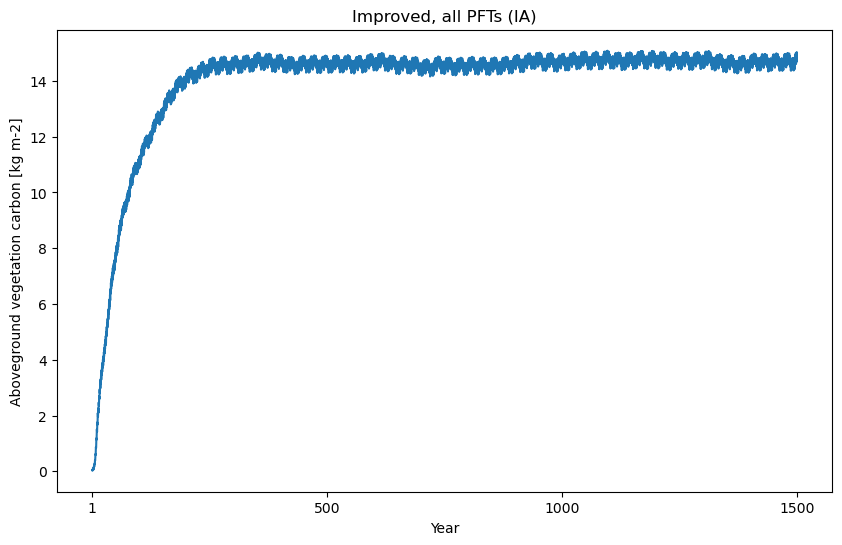

In [31]:
# Create year labels for x axis (otherwise shows month 0-18000)
tick_locations = [0, # first year
                  6000, # year 500 = 500*12months
                  12000, # year 1000
                  18000 # year 1500
                  ]
labels = ['1','500','1000','1500']

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(range(len(IA_data["time"])), # x axis
        IA_data["FATES_VEGC_ABOVEGROUND"]) # y axis
ax.set_title(f"Improved, all PFTs (IA)") # simulation name
ax.set_xlabel("Year")
ax.set_ylabel(f"Aboveground vegetation carbon [{IA_data[AGB_var].units}]")

# Set x-axis tick labels every 500 years
ax.set_xticks(tick_locations)
ax.set_xticklabels(labels)

plt.show()


And then the same plot but for all the five simulations

In [ ]:
# Instantiate figure with subplot grid adapted to number of variables provided
fig, axes = plt.subplots(
    nrows=2,
    ncols=3,
    figsize=(10, 20)
)

# Delete empty axis object if number of variable names in list is odd
if len(axes.flatten()) != 5:
    if len(axes.flatten()) == 2:
        fig.delaxes(axes[-1])
    else:
        fig.delaxes(axes[-1, -1])

# Plot all variables
for simulation in data.items(): #zip(axes.flatten(), var_names):
    data["{simulation}"][var].plot(ax=ax)

ax.plot(data["{simulation}"]['time'], var)
ax.set_title(f"{var_name}")
ax.set_xlabel("Simulation date")
ax.set_ylabel(f"{var.long_name} [{data["{simulation}"][var_name].units}]");

# Plot aboveground vegetation per PFT
The output variable `FATES_VEGC_PF` stores the amount of total biomass in kg of carbon per land area for each included PFT.

In [ ]:
# Variable name for biomass per PFT in dataset
var_name = "FATES_VEGC_PF"

Plot first for the default and improved simulations with *all* PFTs included (DA, IA).

In [ ]:
"""
Load and create dictionaries defining PFT and plot properties.
NB: this is version and model setting dependent!
The 'fates_pft_dict' keys are the PFT indices used in the FATES output.
"""

with open(Path("./dicts/default_fates_pfts.json"), 'r', encoding='utf-8') as fates_pft_json:
    fates_pft_dict = json.load(fates_pft_json)

pft_group_plot_dict = {
    "tree": {
        "linestyle": "-"
    },
    "shrub": {
        "linestyle": "--"
    },
    "grass": {
        "linestyle": ":"
    }
}


#### Default inputs, all PFTs simulation

In [ ]:
# subset variable from data
pft_biomass = data["DA"][var_name]

# Instantiate plot
fig, ax = plt.subplots(figsize=(10,6))

# Create a multi-line plot by looping through PFT properties
plot_handle_list = []

# Determine whether default or customized PFTs were used based on boolean variable
pft_dict = fates_pft_dict

for cur_pft_idx in pft_biomass.fates_levpft:
    
    cur_pft_dict = pft_dict[str(int(cur_pft_idx))]
    
    # Plot biomass for current PFT index
    cur_plot_handles, = ax.plot(data["DA"]['time'],
                                pft_biomass.sel(fates_levpft=cur_pft_idx),
                                label=cur_pft_dict["long_name"],
                                linestyle=pft_group_plot_dict[cur_pft_dict["group"]]["linestyle"],
                                linewidth=1.5
                               )
    
    plot_handle_list.append(cur_plot_handles)

# Set overall plot layout
ax.set_title(f"{DA}: {pft_biomass.long_name}")
ax.set_xlabel("Simulation date", fontsize=14)
ax.set_ylabel(f"{var_name} [{pft_biomass.units}]", fontsize=14)

ax.legend(
    handles=plot_handle_list,
    bbox_to_anchor=(1.05, 1),  # Places the legend outside to the plotting area
    loc='upper left',
    fontsize=11
);

#### Improved inputs, all PFTs simulation

In [ ]:
# subset variable from data
pft_biomass = data["IA"][var_name]

# Instantiate plot
fig, ax = plt.subplots(figsize=(10,6))

# Create a multi-line plot by looping through PFT properties
plot_handle_list = []

# Determine whether default or customized PFTs were used based on boolean variable
pft_dict = fates_pft_dict

for cur_pft_idx in pft_biomass.fates_levpft:
    
    cur_pft_dict = pft_dict[str(int(cur_pft_idx))]
    
    # Plot biomass for current PFT index
    cur_plot_handles, = ax.plot(data["IA"]['time'],
                                pft_biomass.sel(fates_levpft=cur_pft_idx),
                                label=cur_pft_dict["long_name"],
                                linestyle=pft_group_plot_dict[cur_pft_dict["group"]]["linestyle"],
                                linewidth=1.5
                               )
    
    plot_handle_list.append(cur_plot_handles)

# Set overall plot layout
ax.set_title(f"{IA}: {pft_biomass.long_name}")
ax.set_xlabel("Simulation date", fontsize=14)
ax.set_ylabel(f"{var_name} [{pft_biomass.units}]", fontsize=14)

ax.legend(
    handles=plot_handle_list,
    bbox_to_anchor=(1.05, 1),  # Places the legend outside to the plotting area
    loc='upper left',
    fontsize=11
);

#### Grass PFTs only simulations

Adjust code below to get a custom PFT dictionary for grass PFTs

To use the plotting code, we need to enter the same list of PFT indices used when creating the case in the GUI. Copy in from each simulation's readme file (../../results/simulationname) or in general for the GUI:

1. Open the GUI window/tab (localhost:8080) and click on the site name, either using the map or the overview at the top
2. Under `Cases`, search for the case ID you are analyzing here
3. Click on ___See Variables___
4. Copy the list of integers displayed for `included_pft_indices` into the `custom_pft_indices` variable in the code cell below

In [ ]:
custom_pft_indices = [  # Add the comma-seperated list of PFT indices below.
        10, 11, 12
    ]

# Create new dict for included PFTs from default
custom_pft_dict = {str(idx+1): fates_pft_dict[str(pft_idx)] for idx, pft_idx in enumerate(custom_pft_indices)}
print(custom_pft_dict)

Look at the biomass per PFT variable before making the next plot.

In [ ]:
# Display variable details for the DB simulation
pft_biomass = data["DB"][var_name]

In [ ]:
# # Instantiate plot
# fig, ax = plt.subplots(figsize=(10,6))
# 
# # Create a multi-line plot by looping through PFT properties
# plot_handle_list = []
# 
# # Determine whether default or customized PFTs were used based on boolean variable
# pft_dict = custom_pft_dict
# 
# for cur_pft_idx in pft_biomass.fates_levpft:
#     
#     cur_pft_dict = pft_dict[str(int(cur_pft_idx))]
#     
#     # Plot biomass for current PFT index
#     cur_plot_handles, = ax.plot(output_nc_data['time'],
#                                 pft_biomass.sel(fates_levpft=cur_pft_idx),
#                                 label=cur_pft_dict["long_name"],
#                                 linestyle=pft_group_plot_dict[cur_pft_dict["group"]]["linestyle"],
#                                 linewidth=1.5
#                                )
#     
#     plot_handle_list.append(cur_plot_handles)
# 
# # Set overall plot layout
# ax.set_title(f"{case_id}: {pft_biomass.long_name}")
# ax.set_xlabel("Simulation date", fontsize=14)
# ax.set_ylabel(f"{var_name} [{pft_biomass.units}]", fontsize=14)
# 
# ax.legend(
#     handles=plot_handle_list,
#     bbox_to_anchor=(1.05, 1),  # Places the legend outside to the plotting area
#     loc='upper left',
#     fontsize=11
# );

# ----------------------------------------------------------------------------------------------------
# test modified version by chatGPT:
# Instantiate plot
fig, ax = plt.subplots(figsize=(10, 6))

# Create a multi-line plot by looping through PFT properties
plot_handle_list = []

# define new dataset dictionary for the three grass-only simulations
datasets = {'DB': data["DB"], 
            'IB': data["IB"], 
            'IW': data["IW"]}

for dataset_name, dataset in datasets.items():
    pft_biomass = dataset_name[var_name]
    for cur_pft_idx in pft_biomass.fates_levpft:
        cur_pft_dict = custom_pft_dict[str(int(cur_pft_idx))]
        
        # Plot biomass for current PFT index
        cur_plot_handles, = ax.plot(dataset['time'],
                                    pft_biomass.sel(fates_levpft=cur_pft_idx),
                                    label=cur_pft_dict["long_name"],
                                    linestyle=pft_group_plot_dict[cur_pft_dict["group"]]["linestyle"],
                                    linewidth=1.5
                                   )
        
        plot_handle_list.append(cur_plot_handles)

    # Set overall plot layout
    ax.set_title(f"{dataset_name}: {pft_biomass.long_name}")
    ax.set_xlabel("Simulation date", fontsize=14)
    ax.set_ylabel(f"{var_name} [{pft_biomass.units}]", fontsize=14)

ax.legend(
    handles=plot_handle_list,
    bbox_to_anchor=(1.05, 1),  # Places the legend outside the plotting area
    loc='upper left',
    fontsize=11
)

plt.show()


Note that this plot shows the **total PFT-level biomass**, ergo the sum of the above- and belowground biomasses of all respective PFT cohorts across all simulated patches, scaled to kg/m².

---
# Plot NPP per PFT

For the DB, IB, and IW simulations.

In [ ]:
#copy in code from above when it is working and replace the variable name with NPP

---
## check spinup phase

In [ ]:
import math

# Variables to plot from 'output_nc_data', feel free to add more names to the list
var_names = ["FATES_VEGC_ABOVEGROUND", "TWS", "TOTSOMC", "TLAI"]

# Instantiate figure with subplot grid adapted to number of variables provided
fig, axes = plt.subplots(
    nrows=math.ceil(len(var_names)/2),
    ncols=2,
    figsize=(15, math.ceil(len(var_names)/2)*6)
)

# Delete empty axis object if number of variable names in list is odd
if len(axes.flatten()) != len(var_names):
    if len(axes.flatten()) == 2:
        fig.delaxes(axes[-1])
    else:
        fig.delaxes(axes[-1, -1])

# Plot all variables
for ax, var in zip(axes.flatten(), var_names):
    output_nc_data[var].plot(ax=ax)

If you used `runtype=startup` for your simulation, you should see that the values in the plots above start at a somewhat arbitrary value, fluctuate with the seasons, and commonly start increasing over several years. For sufficiently long periods they should stabilize over time: the vegetation and carbon pools reach an equilibrium state. The variables still fluctuate at equilibrium, driven by model processes such as disturbances and plant mortality, and by climatic variability in the forcing data, but the magnitudes and "overall patterns" do not change drastically anymore. Some state variables such as the soil carbon pool can take particularly long until they reach equilibrium due to the slow nature of the involved processes (decomposition, litter buildup, etc.). Reaching a steady state may take a long time, from hundreds to thousands of simulation years, especially in cold or dry climates where vegetation growth is slow.